In [2]:
import pandas as p
data = p.read_csv('diabetes.csv', header='infer')
data[:3]

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive

In [13]:
sample = data.sample(n=3)
sample

preg  plas  pres  skin  insu  mass   pedi  age            class
575     1   119    44    47    63  35.5  0.280   25  tested_negative
735     4    95    60    32     0  35.4  0.284   28  tested_negative
90      1    80    55     0     0  19.1  0.258   21  tested_negative

In [14]:
sample = data.sample(frac=0.005)
sample

preg  plas  pres  skin  insu  mass   pedi  age            class
331     2    87    58    16    52  32.7  0.166   25  tested_negative
586     8   143    66     0     0  34.9  0.129   41  tested_positive
176     6    85    78     0     0  31.2  0.382   42  tested_negative
55      1    73    50    10     0  23.0  0.248   21  tested_negative

# Discretization

In [40]:
data.mass.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: mass, dtype: float64

In [46]:
bins = p.cut(data.mass,5)
bins.head()

0    (26.84, 40.26]
1    (13.42, 26.84]
2    (13.42, 26.84]
3    (26.84, 40.26]
4    (40.26, 53.68]
Name: mass, dtype: category
Categories (5, object): [(-0.0671, 13.42] < (13.42, 26.84] < (26.84, 40.26] < (40.26, 53.68] < (53.68, 67.1]]

In [47]:
bins = p.qcut(data.mass,[0,0.25,0.5,0.75,1])
bins.head()

0      (32, 36.6]
1       [0, 27.3]
2       [0, 27.3]
3      (27.3, 32]
4    (36.6, 67.1]
Name: mass, dtype: category
Categories (4, object): [[0, 27.3] < (27.3, 32] < (32, 36.6] < (36.6, 67.1]]

# Principal Component Analysis

In [1]:
import pandas as p
data = p.read_csv('buy.csv', header='infer')
data

age  membershipYears  numberOfFriends  AmountSpent  NumPurchases
0    21                2                5          100             2
1    38                0               10           10             1
2    18                0                5           25             1
3    19                5               30         1000            25
4    24                0                2           50             3
5    29                2               20          200             7
6    30                4                5         1500            15
7    31                2               70          150             5
8    40                0               11           70             4
9    44                0                8           10             1
10   55                1                2           80             3
11   64                1                0           30             1

In [2]:
data.corr()

age  membershipYears  numberOfFriends  AmountSpent  \
age              1.000000        -0.334731        -0.253233    -0.303731   
membershipYears -0.334731         1.000000         0.343459     0.851307   
numberOfFriends -0.253233         0.343459         1.000000     0.085086   
AmountSpent     -0.303731         0.851307         0.085086     1.000000   
NumPurchases    -0.393919         0.900591         0.288885     0.853188   

                 NumPurchases  
age                 -0.393919  
membershipYears      0.900591  
numberOfFriends      0.288885  
AmountSpent          0.853188  
NumPurchases         1.000000

In [29]:
from numpy import linalg,mean,dot
from pandas import DataFrame

numComponents = 2

cov = data.cov().as_matrix()
A = data.as_matrix()
[eigv, pc] = linalg.eig(cov)
M = (A-mean(A.T,axis=1)).T
projected = dot(pc.T,M).T
projected = DataFrame(projected[:,:numComponents],columns=['pc1','pc2'])
projected

pc1        pc2
0    168.680257   3.738699
1    258.826567   3.412064
2    243.661156   2.452026
3   -731.610997 -16.175841
4    218.704586   7.067655
5     68.649959  -7.919821
6  -1231.217724  15.348058
7    118.511454 -55.146559
8    198.810667   3.219743
9    258.889152   7.066049
10   188.992684  16.299912
11   239.102238  20.638014

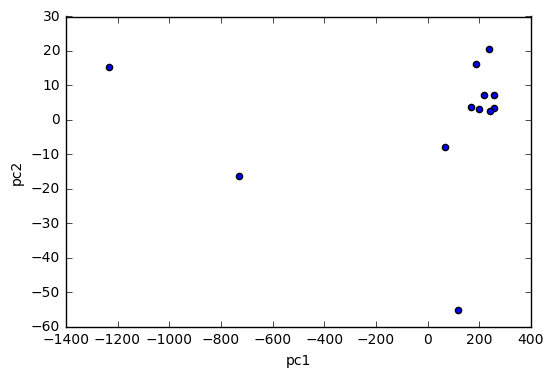

In [30]:
%matplotlib inline

projected.plot(kind='scatter',x='pc1',y='pc2')

In [31]:
pc[:,:numComponents]

array([[ 0.00925599,  0.29153545],
       [-0.00301099, -0.02282163],
       [-0.00352437, -0.95238638],
       [-0.99986089,  0.0072493 ],
       [-0.01307821, -0.08598769]])

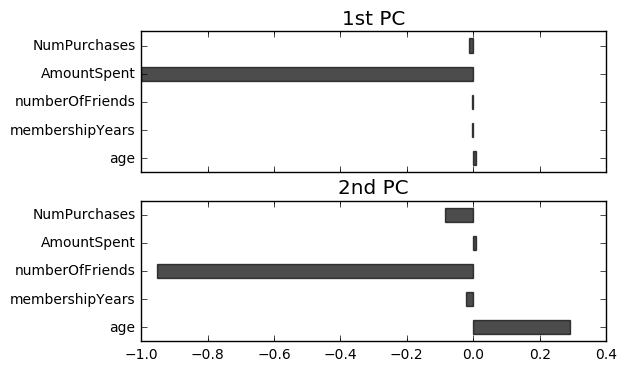

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import Series

fig,axes = plt.subplots(2,1,sharex=True)
attrib = list(data)         # get attribute names
pcdata  = Series(pc[:,0], index=attrib)
pcdata.plot(kind='barh',ax=axes[0],color='k',alpha=0.7)
q
pcdata  = Series(pc[:,1], index=attrib)
pcdata.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)
axes[1].set_title(r'2nd PC', size = 'x-large')